# Onset Detection

In [175]:
%matplotlib inline
#import os
import madmom
import madmom.features.onsets as od
from madmom.audio import Spectrogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
import librosa, librosa.display
import IPython.display as ipd

---

## Functions

### Read Audio

In [151]:
def read_audio(file_path, print_it=False):
    audio, sr = librosa.load(file_path)
    if print_it:
        print(audio.shape)
        print(sr)
    return audio, sr

### Trim audio

In [152]:
def trim_audio(audio, sr, t_i, t_f):
    i = t_i * sr
    f= t_f * sr
    t_audio = audio[i:f]
    return t_audio

### Plot Audio

In [92]:
def plot_audio(x, sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    return

### Display Spectrogram

In [74]:
def show_spectrogram(x, sr, y_scale='linear', frame_size=2048):
    X = librosa.stft(x, n_fft=frame_size)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis=y_scale, n_fft=frame_size)
    return

### Playing Audio

In [75]:
def play_audio(file_path):
    ipd.Audio(file_path) # load a local WAV file

### Madmom Spectrogram

In [76]:
def madmom_spectrogram(file_path):
    spec = Spectrogram(file_path)
    return spec

### HFC

In [267]:
def hfc(spec):
    hfc_df = od.high_frequency_content(spec)
    return hfc_df

### CNN OD

In [268]:
def cnn_od(audio):
    proc = od.CNNOnsetProcessor()
    df = proc(audio)
    return df

### Normalize DF

In [105]:
def normalize_df(df):
    m = max(df)
    normalized_df = df/m
    return normalized_df

### Plot DF

In [328]:
def plot_df(audio, sr, df_bins, df, c='r', a=0.5):
    samples = audio.shape[0]
    s = samples / sr
    x = np.linspace(0, s, df_bins)
    if df.dtype == int:
        plt.vlines(onset_times(df, df_bins, s), min(audio), max(audio), color=c, alpha=a)
    else:
        plt.plot(x, df, color=c, alpha=a)
    #plt.show()
    return

### Thresholding

In [242]:
def thresholding(df, df_bins, p_bins=0.01):
    n_bins = int(df_bins * p_bins) if p_bins > 0 else 1
    #n_bins = int(df_bins * p_bins)
    binary_function = argrelextrema(df, np.greater, order=n_bins)    
    binary_function = binary_function[0]
    return binary_function

### Peak Picking

In [304]:
def peak_picking(df, t=0.8):
    pp = od.peak_picking(df, t)
    return pp

### Onset Times

In [195]:
def onset_times(b_df, df_bins, s):
    #onset_times = [i for i,x in enumerate(b_df) if x]
    onset_times = [x / df_bins * s for x in b_df]
    #print(onset_times)
    return onset_times    

### Plot combined

In [309]:
def plot_combined(audio, sr, df_bins, df):
    plot_audio(audio, sr)
    plot_df(audio, sr, df_bins, df, c='r', a=0.5)    
    return

---

## Main

In [310]:
#Read audio file from path
file_path = "../data/in_my_life-the_beatles-t-trimmed.wav"
audio, sr = read_audio(file_path)
#audio = trim_audio(audio, sr, 20, 30)

In [311]:
#Play audio
ipd.Audio(audio, rate=sr) # load a local WAV file

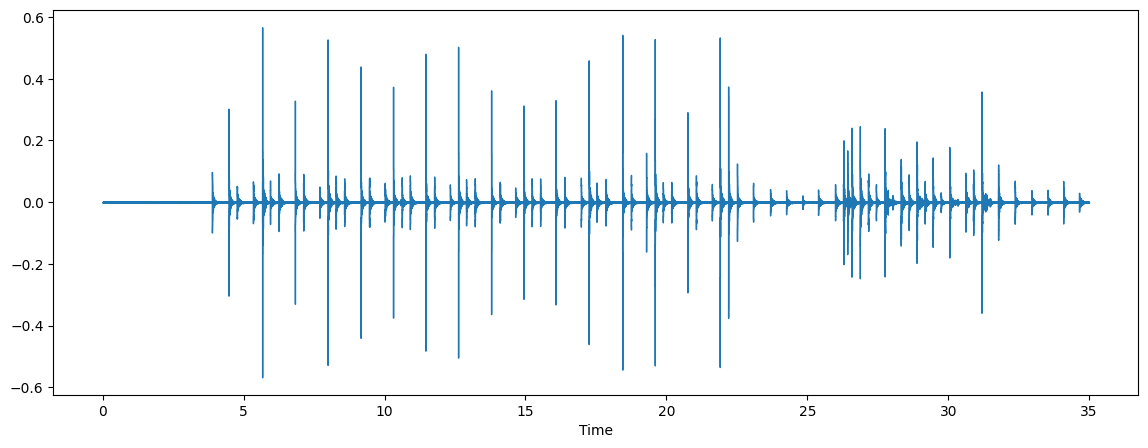

In [312]:
#Visualize waveform
plot_audio(audio, sr)

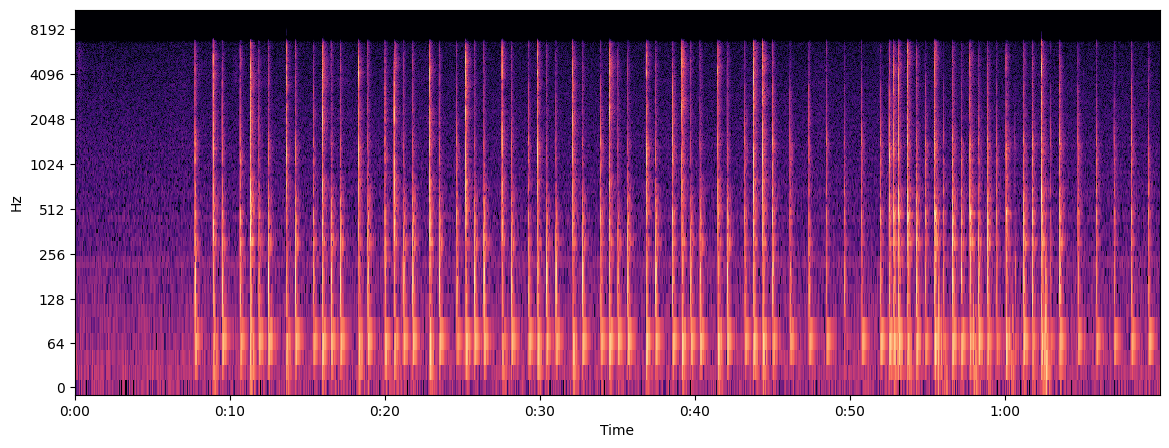

In [313]:
#Show audio spectrogram
show_spectrogram(audio, sr, y_scale='log', frame_size=1024)

In [314]:
#Madmom Spectrogram
spec = madmom_spectrogram(audio)
spec.shape

(1750, 1024)

In [315]:
#HFC OD
hfc_df = hfc(spec)
hfc_df = np.asarray(hfc_df)
hfc_df_bins = hfc_df.size

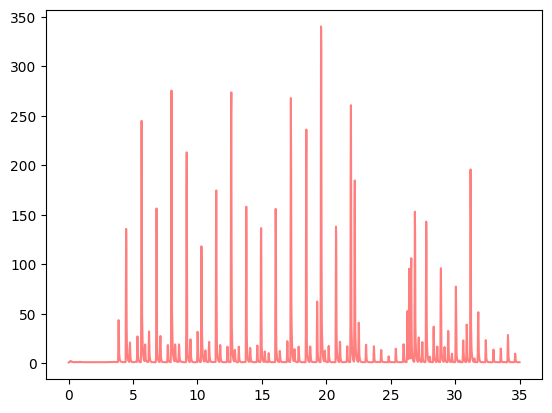

In [329]:
#Plot DF
plot_df(audio, sr, hfc_df_bins, hfc_df)
plt.show()

In [317]:
#Thresholding
b_hfc_df = thresholding(hfc_df, hfc_df_bins)

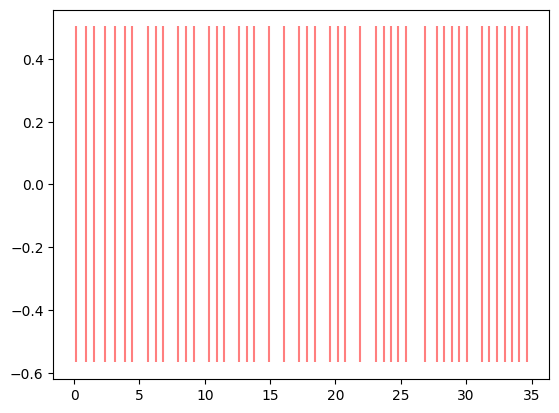

In [318]:
#Plot DF
plot_df(audio, sr, hfc_df_bins, b_hfc_df, c='r', a=0.5)
plt.show()

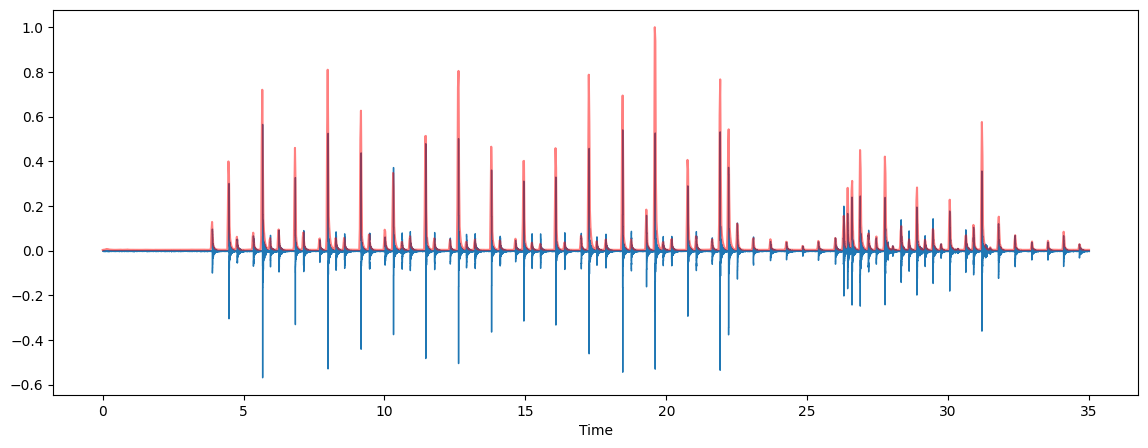

In [319]:
#Plot Waveform + DF
plot_combined(audio, sr, hfc_df_bins, normalize_df(hfc_df))

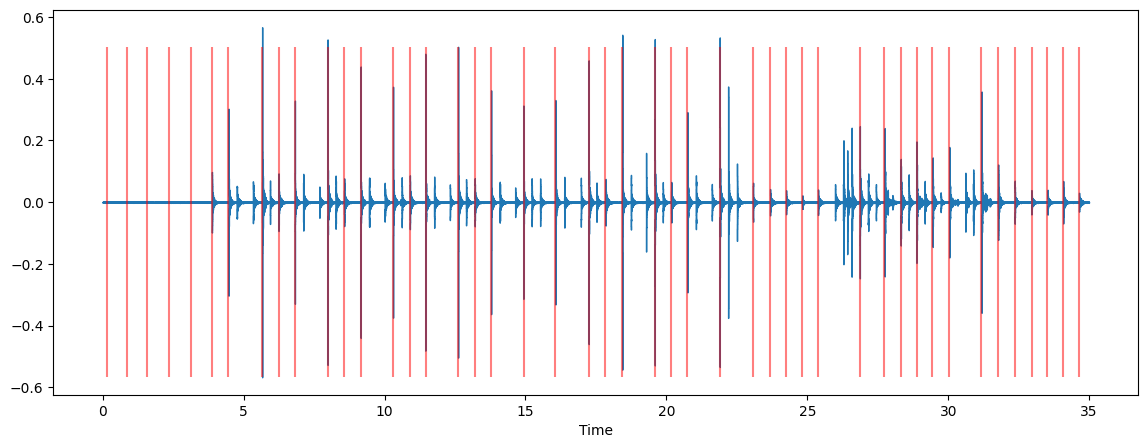

In [320]:
#Plot Waveform + DF
plot_combined(audio, sr, hfc_df_bins, b_hfc_df)

In [321]:
#CNN OD
cnn_df = cnn_od(audio)
cnn_df_bins = cnn_df.size

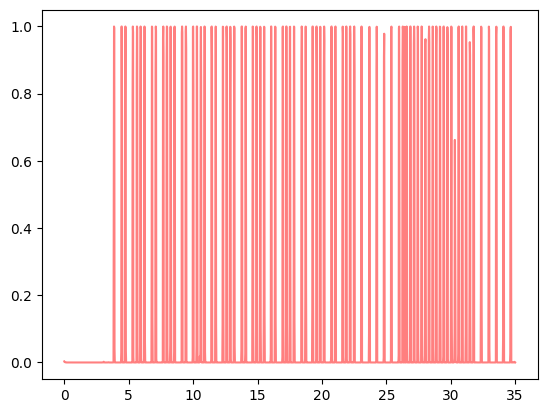

In [330]:
#Plot DF
plot_df(audio, sr, cnn_df_bins, cnn_df)
plt.show()

In [323]:
#Thresholding
b_cnn_df = thresholding(cnn_df, cnn_df_bins)

In [324]:
#Peak picking
b_cnn_df = peak_picking(cnn_df)

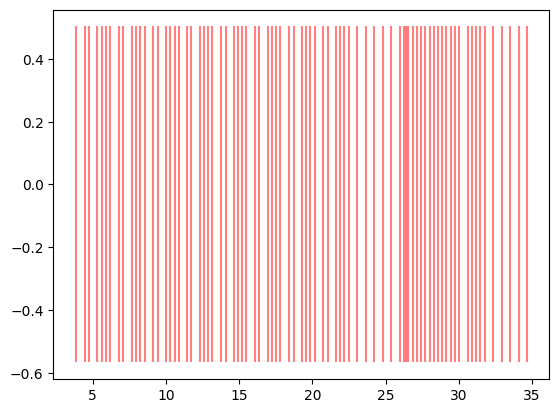

In [325]:
#Plot DF
plot_df(audio, sr, cnn_df_bins, b_cnn_df, c='r', a=0.5)
plt.show()

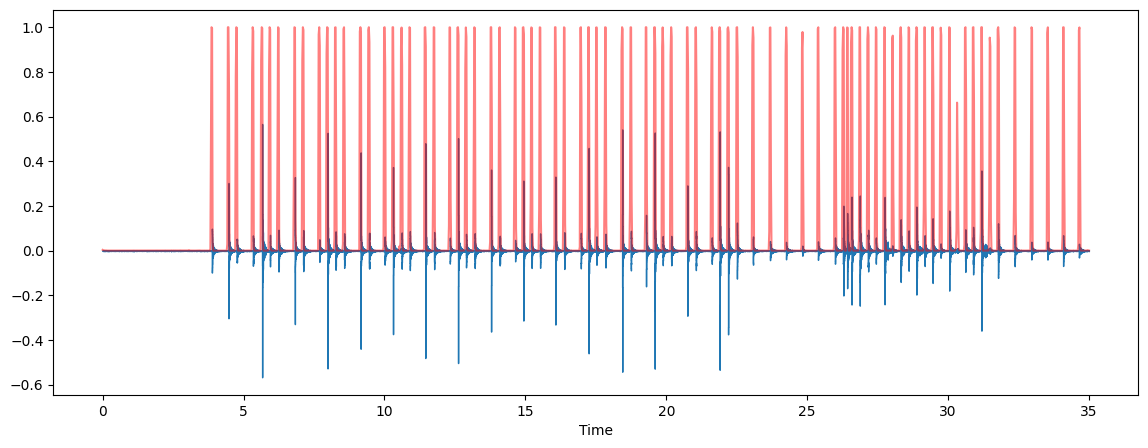

In [326]:
#Plot Waveform + DF
plot_combined(audio, sr, cnn_df_bins, normalize_df(cnn_df))

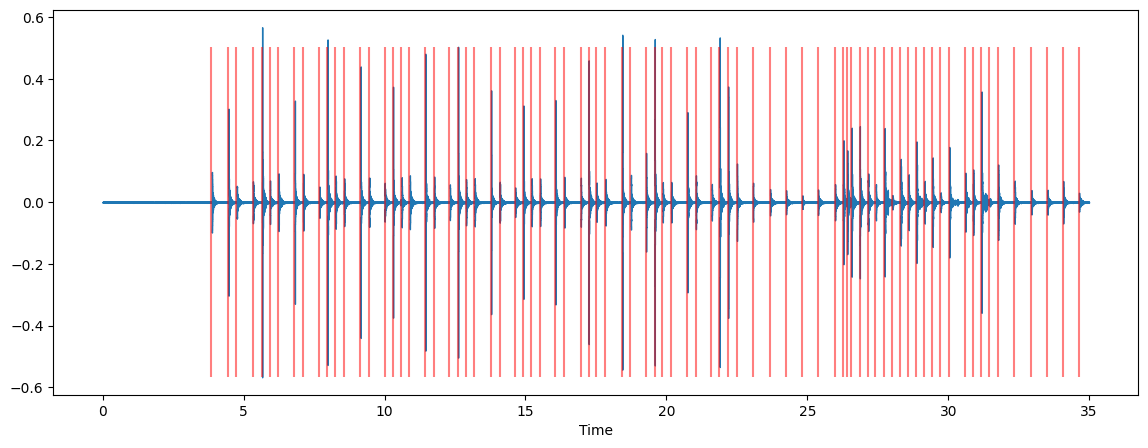

In [327]:
#Plot Waveform + DF
plot_combined(audio, sr, cnn_df_bins, b_cnn_df)